<a href="https://colab.research.google.com/github/cyberhades21/MachineLearning/blob/main/Multiple_Linear_Regression_Using_Adverticement_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import seaborn as sns
from google.colab import files
import matplotlib.pyplot as plt

In [2]:
uploaded = files.upload()


Saving Advertising.csv to Advertising.csv


In [3]:
dataset = pd.read_csv('Advertising.csv')


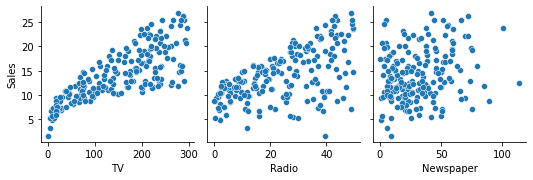

In [4]:
df = dataset[['TV','Radio','Newspaper','Sales']]
sns.pairplot(df,x_vars=['TV','Radio','Newspaper'],y_vars = 'Sales')
plt.show()


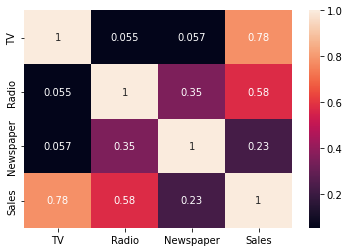

In [5]:
sns.heatmap(df.corr(),annot = True)


In [6]:
X = dataset[['TV','Radio','Newspaper']]
X1 = np.array(dataset['TV'])
X2 = np.array(dataset['Radio'])
X3 = np.array(dataset['Newspaper'])
X4 = dataset[['TV','Radio']]
X5 = dataset[['TV','Newspaper']]
y = dataset['Sales']

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3,
random_state=0)
X1_train, X1_test, y_train, y_test = train_test_split(X1, y, test_size=1/3,
random_state=0)
X2_train, X2_test, y_train, y_test = train_test_split(X2, y, test_size=1/3,
random_state=0)
X3_train, X3_test, y_train, y_test = train_test_split(X3, y, test_size=1/3,
random_state=0)
X4_train, X4_test, y_train, y_test = train_test_split(X4, y, test_size=1/3,
random_state=0)
X5_train, X5_test, y_train, y_test = train_test_split(X5, y, test_size=1/3,
random_state=0)

In [8]:
from sklearn.linear_model import LinearRegression
model = linear_model.LinearRegression()
model.fit(X_train, y_train)
model1 = linear_model.LinearRegression()
model1.fit(X1_train.reshape(-1, 1), y_train)
model2 = linear_model.LinearRegression()
model2.fit(X2_train.reshape(-1, 1), y_train)
model3 = linear_model.LinearRegression()
model3.fit(X3_train.reshape(-1, 1), y_train)
model4 = linear_model.LinearRegression()
model4.fit(X4_train, y_train)
model5 = linear_model.LinearRegression()
model5.fit(X5_train, y_train)


LinearRegression()

In [9]:
y_test_pred = model.predict(X_test)
y_test_pred1 = model1.predict(X1_test.reshape(-1, 1))
y_test_pred2 = model2.predict(X2_test.reshape(-1, 1))
y_test_pred3 = model3.predict(X3_test.reshape(-1, 1))
y_test_pred4 = model4.predict(X4_test)
y_test_pred5 = model5.predict(X5_test)

In [10]:
import sklearn.metrics as sm
print("R2 score fot all features =",
round(sm.r2_score(y_test, y_test_pred)*100,2),"%")
print("R2 score for TV =",
round(sm.r2_score(y_test, y_test_pred1)*100,2),"%")
print("R2 score for Radio =",
round(sm.r2_score(y_test, y_test_pred2)*100,2),"%")
print("R2 score for Newspaper =",
round(sm.r2_score(y_test, y_test_pred3)*100,2),"%")
print("R2 score for TV and Radio =",
round(sm.r2_score(y_test, y_test_pred4)*100,2),"%")
print("R2 score for TV and Newspaper =",
round(sm.r2_score(y_test, y_test_pred5)*100,2),"%")


R2 score fot all features = 87.11 %
R2 score for TV = 68.0 %
R2 score for Radio = 18.69 %
R2 score for Newspaper = -2.6 %
R2 score for TV and Radio = 87.22 %
R2 score for TV and Newspaper = 71.97 %


In [11]:
print("Slope for TV =",model1.coef_)
print("Intercept for TV=",model1.intercept_)
print("Mean squared error of TV =",
round(sm.mean_squared_error(y_test, y_test_pred1), 2))
print("Mean absoulte error of TV =",
round(sm.mean_absolute_error(y_test, y_test_pred1),2))

Slope for TV = [0.04689391]
Intercept for TV= 7.217216122978863
Mean squared error of TV = 8.41
Mean absoulte error of TV = 2.2


Text(0, 0.5, 'Sales')

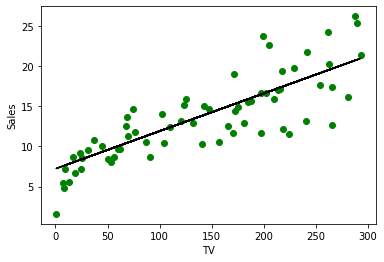

In [12]:
plt.scatter(X1_test, y_test, color='green')
plt.plot(X1_test, y_test_pred1, color = 'black')
plt.xlabel("TV")
plt.ylabel("Sales")


In [13]:
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics

from sklearn.metrics import mean_squared_error


In [14]:
lm = LinearRegression()
scores=cross_val_score(lm, X, y, cv=15)
print("CROSS VALIDATAION",np.mean(scores))
lm.fit(X_test,y_test)
print("WITHOUT CROSS VALIDATION",lm.score(X_test,y_test))
scores = cross_val_score(lm, X_test, y_test, scoring='neg_mean_squared_error',cv=15, n_jobs=-1)
print("ERROR WITH CROSS VALIDATION:",np.mean(scores))
print("Error without cross validation",mean_squared_error(y_test,y_test_pred1))


CROSS VALIDATAION 0.8722434812544486
WITHOUT CROSS VALIDATION 0.8840876977928991
ERROR WITH CROSS VALIDATION: -3.623484524773409
Error without cross validation 8.407193534800252


In [15]:
feature_cols = ['TV', 'Radio']
X_1 = dataset[feature_cols]
scores=cross_val_score(lm, X_1, y, cv=15)
print("CROSS VALIDATAION",np.mean(scores))
lm.fit(X_1,y)
print("WITHOUT CROSS VALIDATION",lm.score(X_1,y))
scores = cross_val_score(lm, X_1, y, scoring='neg_mean_squared_error',cv=15, n_jobs=-1)
print("ERROR WITH CROSS VALIDATION:",np.mean(scores))
print("Error without cross validation",mean_squared_error(y_test,y_test_pred1))

CROSS VALIDATAION 0.8736136558084051
WITHOUT CROSS VALIDATION 0.8971942610828957
ERROR WITH CROSS VALIDATION: -2.9495372164285723
Error without cross validation 8.407193534800252


In [16]:
feature_cols = ['TV', 'Radio']
X_1 = dataset[feature_cols]
scores=cross_val_score(lm, X_1, y, cv=12)
print("CROSS VALIDATAION",np.mean(scores))
lm.fit(X_1,y)
print("WITHOUT CROSS VALIDATION",lm.score(X_1,y))
scores = cross_val_score(lm, X_1, y, scoring='neg_mean_squared_error',cv=12, n_jobs=-1)
print("ERROR WITH CROSS VALIDATION:",np.mean(scores))
print("Error without cross validation",mean_squared_error(y_test,y_test_pred1))

CROSS VALIDATAION 0.8862330509464185
WITHOUT CROSS VALIDATION 0.8971942610828957
ERROR WITH CROSS VALIDATION: -2.9765387531749083
Error without cross validation 8.407193534800252


In [17]:
feature_cols = ['TV', 'Radio']
X_1 = dataset[feature_cols]
scores=cross_val_score(lm, X_1, y, cv=25)
print("CROSS VALIDATAION",np.mean(scores))
lm.fit(X_1,y)
print("WITHOUT CROSS VALIDATION",lm.score(X_1,y))
scores = cross_val_score(lm, X_1, y, scoring='neg_mean_squared_error',cv=25, n_jobs=-1)
print("ERROR WITH CROSS VALIDATION:",np.mean(scores))
print("Error without cross validation",mean_squared_error(y_test,y_test_pred1))

CROSS VALIDATAION 0.8723079357790339
WITHOUT CROSS VALIDATION 0.8971942610828957
ERROR WITH CROSS VALIDATION: -2.9371269939204803
Error without cross validation 8.407193534800252


In [18]:
feature_cols = ['TV', 'Radio']
X_1 = dataset[feature_cols]
scores=cross_val_score(lm, X_1, y, cv=7)
print("CROSS VALIDATAION",np.mean(scores))
lm.fit(X_1,y)
print("WITHOUT CROSS VALIDATION",lm.score(X_1,y))
scores = cross_val_score(lm, X_1, y, scoring='neg_mean_squared_error',cv=7, n_jobs=-1)
print("ERROR WITH CROSS VALIDATION:",np.mean(scores))
print("Error without cross validation",mean_squared_error(y_test,y_test_pred1))

CROSS VALIDATAION 0.887824825599243
WITHOUT CROSS VALIDATION 0.8971942610828957
ERROR WITH CROSS VALIDATION: -2.9525713929492254
Error without cross validation 8.407193534800252
